# Fit the population-level model across a wide range of halo masses

In the `dev_prelim_e_models.ipynb` notebook we built a functional form that let us make predictions for $P({\rm e}(t)\vert M_0),$ and we verified that our model can do a pretty job of capturing the behavior of this distribution for a population of halos of a single halo mass, $M_0=10^{13.5}M_{\odot}.$ In this notebook, we'll run our fitter over and over again for a wide range of halos, separately optimizing our model for each narrow bin of halo mass. This will let us verify that our model is sufficiently flexible to capture the behavior of the full range of cosmologically relevant masses. Additionally, we'll record the results for what the best-fit parameters are for each halo mass bin, and then in a separate notebook, we'll build a model for how the values of these best-fit parameters change as a function of $M_0.$

In [1]:
%matplotlib inline

In [2]:
from diffprof.load_diffprof_fits import load_bpl_fits, load_mdpl2_fits

drn = "/Users/aphearin/work/DATA/diffprof_data"

mdpl_fits = load_mdpl2_fits(drn)
bpl_fits = load_bpl_fits(drn)
print(sorted(mdpl_fits.keys()))

['conc_early', 'conc_k', 'conc_late', 'conc_lgtc', 'e_early', 'e_k', 'e_late', 'e_lgtc', 'halo_id', 'logmp', 'mah_early', 'mah_k', 'mah_late', 'mah_lgtc']


For our very initial guess, we'll again use the parameter dictionary stored in the `predict_e_history_singlemass` module. However, remember that this default value was selected according to our trial halo mass of $M_0=10^{13.5}M_{\odot},$ and so again we'll use our trick of making two successive calls to the optimizer to ensure stable results.

After doing this once for $M_0=10^{12}M_{\odot},$ from then on, after moving to the next halo mass, we'll use the previous best-fit value as our initial guess. This is based on the physically natural expectation that the best-fitting point we find will not vary rapidly for halos of similar mass. Since our eventual goal is to build a model for how these parameters depend upon $M_0,$ this trick will also help ensure stable results for the $M_0-$dependence.

Note that the way I wrote the control flow in the first few lines of the first cell looks a little clunky, but it made it a lot easier to just copy-and-paste things for halos of different masses. 

In [3]:
from diffprof.predict_e_history_singlemass import loss, DEFAULT_U_PARAMS, e_vs_t_vmap, mc_generate_e_history
from scipy.optimize import minimize

p_default = np.array(list(DEFAULT_U_PARAMS.values()))
tarr_fit = np.linspace(2.5, 13.8, 50)

outpat = "p_best_logmp_{0:.2f}"

## $\log_{10}M_{\rm peak}=12$

In [4]:
p_best_last = np.copy(p_default)

In [6]:
logmp_sample = 12

if logmp_sample >= 13.5:
    halos = mdpl_fits
else:
    halos = bpl_fits

mmsk = np.abs(halos['logmp'] - logmp_sample) < 0.1
sample = halos[mmsk]

e_history_target = e_vs_t_vmap(tarr_fit, 10**sample['e_lgtc'], sample['e_k'], sample['e_early'], sample['e_late'])
e_mean_target = np.mean(e_history_target, axis=0)
e_std_target = np.std(e_history_target, axis=0)

loss_data = tarr_fit, e_mean_target, e_std_target

In [7]:
res = minimize(loss, p_best_last, args=(loss_data, ), method='Nelder-Mead')
res = minimize(loss, res.x, args=(loss_data, ), method='Nelder-Mead')
p_best = res.x
print(res.message)
np.save(outpat.format(logmp_sample), p_best)
p_best_last = np.copy(p_best)

Optimization terminated successfully.


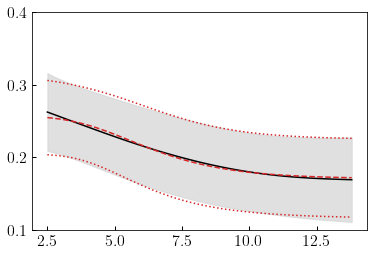

In [8]:
e_history_best = mc_generate_e_history(tarr_fit, p_best)
e_h_med_best = np.mean(e_history_best, axis=0)
e_h_std_best = np.std(e_history_best, axis=0)

fig, ax = plt.subplots(1, 1)
ylim = ax.set_ylim(0.1, 0.4)
__=ax.fill_between(tarr_fit, e_mean_target-e_std_target, e_mean_target+e_std_target, alpha=0.7, color='lightgray')
__=ax.plot(tarr_fit, e_mean_target, color='k')

__=ax.plot(tarr_fit, e_h_med_best, '--', color=mred)
__=ax.plot(tarr_fit, e_h_med_best-e_h_std_best, ':', color=mred)
__=ax.plot(tarr_fit, e_h_med_best+e_h_std_best, ':', color=mred)

So far so good! Now let's move on to all the different masses below, recording the result as a `.npy` file each time. 

## $\log_{10}M_{\rm peak}=12.25$

In [9]:
logmp_sample = 12.25

if logmp_sample >= 13.5:
    halos = mdpl_fits
else:
    halos = bpl_fits

mmsk = np.abs(halos['logmp'] - logmp_sample) < 0.1
sample = halos[mmsk]

e_history_target = e_vs_t_vmap(tarr_fit, 10**sample['e_lgtc'], sample['e_k'], sample['e_early'], sample['e_late'])
e_mean_target = np.mean(e_history_target, axis=0)
e_std_target = np.std(e_history_target, axis=0)

loss_data = tarr_fit, e_mean_target, e_std_target

In [10]:
res = minimize(loss, p_best_last, args=(loss_data, ), method='Nelder-Mead')
res = minimize(loss, res.x, args=(loss_data, ), method='Nelder-Mead')
p_best = res.x
print(res.message)
np.save(outpat.format(logmp_sample), p_best)
p_best_last = np.copy(p_best)

Optimization terminated successfully.


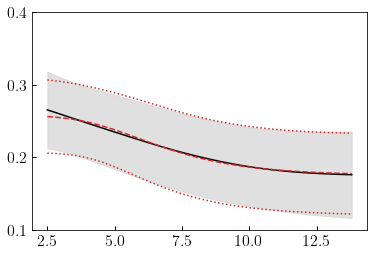

In [11]:
e_history_best = mc_generate_e_history(tarr_fit, p_best)
e_h_med_best = np.mean(e_history_best, axis=0)
e_h_std_best = np.std(e_history_best, axis=0)

fig, ax = plt.subplots(1, 1)
ylim = ax.set_ylim(0.1, 0.4)
__=ax.fill_between(tarr_fit, e_mean_target-e_std_target, e_mean_target+e_std_target, alpha=0.7, color='lightgray')
__=ax.plot(tarr_fit, e_mean_target, color='k')

__=ax.plot(tarr_fit, e_h_med_best, '--', color=mred)
__=ax.plot(tarr_fit, e_h_med_best-e_h_std_best, ':', color=mred)
__=ax.plot(tarr_fit, e_h_med_best+e_h_std_best, ':', color=mred)

## $\log_{10}M_{\rm peak}=12.5$

In [12]:
logmp_sample = 12.5

if logmp_sample >= 13.5:
    halos = mdpl_fits
else:
    halos = bpl_fits

mmsk = np.abs(halos['logmp'] - logmp_sample) < 0.1
sample = halos[mmsk]

e_history_target = e_vs_t_vmap(tarr_fit, 10**sample['e_lgtc'], sample['e_k'], sample['e_early'], sample['e_late'])
e_mean_target = np.mean(e_history_target, axis=0)
e_std_target = np.std(e_history_target, axis=0)

loss_data = tarr_fit, e_mean_target, e_std_target

In [13]:
res = minimize(loss, p_best_last, args=(loss_data, ), method='Nelder-Mead')
res = minimize(loss, res.x, args=(loss_data, ), method='Nelder-Mead')
p_best = res.x
print(res.message)
np.save(outpat.format(logmp_sample), p_best)
p_best_last = np.copy(p_best)

Optimization terminated successfully.


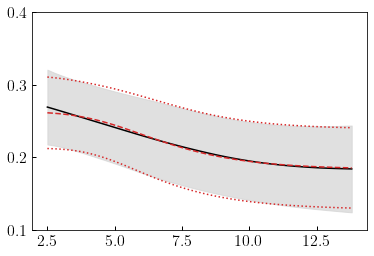

In [14]:
e_history_best = mc_generate_e_history(tarr_fit, p_best)
e_h_med_best = np.mean(e_history_best, axis=0)
e_h_std_best = np.std(e_history_best, axis=0)

fig, ax = plt.subplots(1, 1)
ylim = ax.set_ylim(0.1, 0.4)
__=ax.fill_between(tarr_fit, e_mean_target-e_std_target, e_mean_target+e_std_target, alpha=0.7, color='lightgray')
__=ax.plot(tarr_fit, e_mean_target, color='k')

__=ax.plot(tarr_fit, e_h_med_best, '--', color=mred)
__=ax.plot(tarr_fit, e_h_med_best-e_h_std_best, ':', color=mred)
__=ax.plot(tarr_fit, e_h_med_best+e_h_std_best, ':', color=mred)

## $\log_{10}M_{\rm peak}=12.75$

In [15]:
logmp_sample = 12.75

if logmp_sample >= 13.5:
    halos = mdpl_fits
else:
    halos = bpl_fits

mmsk = np.abs(halos['logmp'] - logmp_sample) < 0.1
sample = halos[mmsk]

e_history_target = e_vs_t_vmap(tarr_fit, 10**sample['e_lgtc'], sample['e_k'], sample['e_early'], sample['e_late'])
e_mean_target = np.mean(e_history_target, axis=0)
e_std_target = np.std(e_history_target, axis=0)

loss_data = tarr_fit, e_mean_target, e_std_target

In [16]:
res = minimize(loss, p_best_last, args=(loss_data, ), method='Nelder-Mead')
res = minimize(loss, res.x, args=(loss_data, ), method='Nelder-Mead')
p_best = res.x
print(res.message)
np.save(outpat.format(logmp_sample), p_best)
p_best_last = np.copy(p_best)

Optimization terminated successfully.


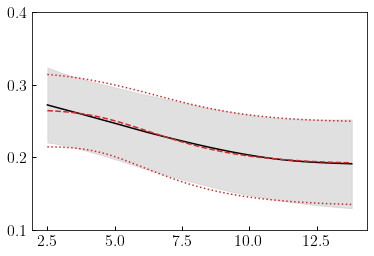

In [17]:
e_history_best = mc_generate_e_history(tarr_fit, p_best)
e_h_med_best = np.mean(e_history_best, axis=0)
e_h_std_best = np.std(e_history_best, axis=0)

fig, ax = plt.subplots(1, 1)
ylim = ax.set_ylim(0.1, 0.4)
__=ax.fill_between(tarr_fit, e_mean_target-e_std_target, e_mean_target+e_std_target, alpha=0.7, color='lightgray')
__=ax.plot(tarr_fit, e_mean_target, color='k')

__=ax.plot(tarr_fit, e_h_med_best, '--', color=mred)
__=ax.plot(tarr_fit, e_h_med_best-e_h_std_best, ':', color=mred)
__=ax.plot(tarr_fit, e_h_med_best+e_h_std_best, ':', color=mred)

## $\log_{10}M_{\rm peak}=13$

In [18]:
logmp_sample = 13

if logmp_sample >= 13.5:
    halos = mdpl_fits
else:
    halos = bpl_fits

mmsk = np.abs(halos['logmp'] - logmp_sample) < 0.1
sample = halos[mmsk]

e_history_target = e_vs_t_vmap(tarr_fit, 10**sample['e_lgtc'], sample['e_k'], sample['e_early'], sample['e_late'])
e_mean_target = np.mean(e_history_target, axis=0)
e_std_target = np.std(e_history_target, axis=0)

loss_data = tarr_fit, e_mean_target, e_std_target

In [19]:
res = minimize(loss, p_best_last, args=(loss_data, ), method='Nelder-Mead')
res = minimize(loss, res.x, args=(loss_data, ), method='Nelder-Mead')
p_best = res.x
print(res.message)
np.save(outpat.format(logmp_sample), p_best)
p_best_last = np.copy(p_best)

Optimization terminated successfully.


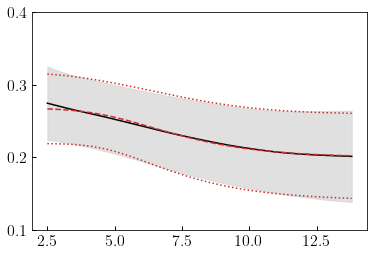

In [20]:
e_history_best = mc_generate_e_history(tarr_fit, p_best)
e_h_med_best = np.mean(e_history_best, axis=0)
e_h_std_best = np.std(e_history_best, axis=0)

fig, ax = plt.subplots(1, 1)
ylim = ax.set_ylim(0.1, 0.4)
__=ax.fill_between(tarr_fit, e_mean_target-e_std_target, e_mean_target+e_std_target, alpha=0.7, color='lightgray')
__=ax.plot(tarr_fit, e_mean_target, color='k')

__=ax.plot(tarr_fit, e_h_med_best, '--', color=mred)
__=ax.plot(tarr_fit, e_h_med_best-e_h_std_best, ':', color=mred)
__=ax.plot(tarr_fit, e_h_med_best+e_h_std_best, ':', color=mred)

## $\log_{10}M_{\rm peak}=13.25$

In [21]:
logmp_sample = 13.25

if logmp_sample >= 13.5:
    halos = mdpl_fits
else:
    halos = bpl_fits

mmsk = np.abs(halos['logmp'] - logmp_sample) < 0.1
sample = halos[mmsk]

e_history_target = e_vs_t_vmap(tarr_fit, 10**sample['e_lgtc'], sample['e_k'], sample['e_early'], sample['e_late'])
e_mean_target = np.mean(e_history_target, axis=0)
e_std_target = np.std(e_history_target, axis=0)

loss_data = tarr_fit, e_mean_target, e_std_target

In [22]:
res = minimize(loss, p_best_last, args=(loss_data, ), method='Nelder-Mead')
res = minimize(loss, res.x, args=(loss_data, ), method='Nelder-Mead')
p_best = res.x
print(res.message)
np.save(outpat.format(logmp_sample), p_best)
p_best_last = np.copy(p_best)

Optimization terminated successfully.


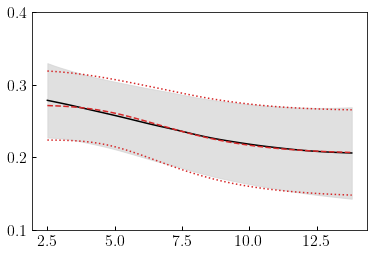

In [23]:
e_history_best = mc_generate_e_history(tarr_fit, p_best)
e_h_med_best = np.mean(e_history_best, axis=0)
e_h_std_best = np.std(e_history_best, axis=0)

fig, ax = plt.subplots(1, 1)
ylim = ax.set_ylim(0.1, 0.4)
__=ax.fill_between(tarr_fit, e_mean_target-e_std_target, e_mean_target+e_std_target, alpha=0.7, color='lightgray')
__=ax.plot(tarr_fit, e_mean_target, color='k')

__=ax.plot(tarr_fit, e_h_med_best, '--', color=mred)
__=ax.plot(tarr_fit, e_h_med_best-e_h_std_best, ':', color=mred)
__=ax.plot(tarr_fit, e_h_med_best+e_h_std_best, ':', color=mred)

## $\log_{10}M_{\rm peak}=13.5$

In [24]:
logmp_sample = 13.5

if logmp_sample >= 13.5:
    halos = mdpl_fits
else:
    halos = bpl_fits

mmsk = np.abs(halos['logmp'] - logmp_sample) < 0.1
sample = halos[mmsk]

e_history_target = e_vs_t_vmap(tarr_fit, 10**sample['e_lgtc'], sample['e_k'], sample['e_early'], sample['e_late'])
e_mean_target = np.mean(e_history_target, axis=0)
e_std_target = np.std(e_history_target, axis=0)

loss_data = tarr_fit, e_mean_target, e_std_target

In [25]:
res = minimize(loss, p_best_last, args=(loss_data, ), method='Nelder-Mead')
res = minimize(loss, res.x, args=(loss_data, ), method='Nelder-Mead')
p_best = res.x
print(res.message)
np.save(outpat.format(logmp_sample), p_best)
p_best_last = np.copy(p_best)

Optimization terminated successfully.


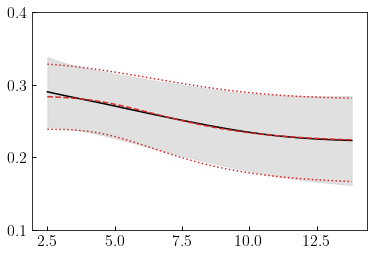

In [26]:
e_history_best = mc_generate_e_history(tarr_fit, p_best)
e_h_med_best = np.mean(e_history_best, axis=0)
e_h_std_best = np.std(e_history_best, axis=0)

fig, ax = plt.subplots(1, 1)
ylim = ax.set_ylim(0.1, 0.4)
__=ax.fill_between(tarr_fit, e_mean_target-e_std_target, e_mean_target+e_std_target, alpha=0.7, color='lightgray')
__=ax.plot(tarr_fit, e_mean_target, color='k')

__=ax.plot(tarr_fit, e_h_med_best, '--', color=mred)
__=ax.plot(tarr_fit, e_h_med_best-e_h_std_best, ':', color=mred)
__=ax.plot(tarr_fit, e_h_med_best+e_h_std_best, ':', color=mred)

## $\log_{10}M_{\rm peak}=13.75$

In [27]:
logmp_sample = 13.75

if logmp_sample >= 13.5:
    halos = mdpl_fits
else:
    halos = bpl_fits

mmsk = np.abs(halos['logmp'] - logmp_sample) < 0.1
sample = halos[mmsk]

e_history_target = e_vs_t_vmap(tarr_fit, 10**sample['e_lgtc'], sample['e_k'], sample['e_early'], sample['e_late'])
e_mean_target = np.mean(e_history_target, axis=0)
e_std_target = np.std(e_history_target, axis=0)

loss_data = tarr_fit, e_mean_target, e_std_target

In [28]:
res = minimize(loss, p_best_last, args=(loss_data, ), method='Nelder-Mead')
res = minimize(loss, res.x, args=(loss_data, ), method='Nelder-Mead')
p_best = res.x
print(res.message)
np.save(outpat.format(logmp_sample), p_best)
p_best_last = np.copy(p_best)

Optimization terminated successfully.


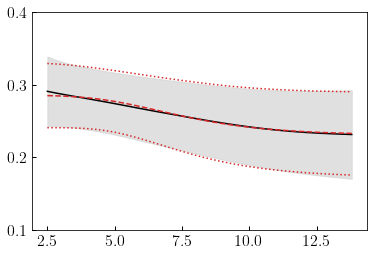

In [29]:
e_history_best = mc_generate_e_history(tarr_fit, p_best)
e_h_med_best = np.mean(e_history_best, axis=0)
e_h_std_best = np.std(e_history_best, axis=0)

fig, ax = plt.subplots(1, 1)
ylim = ax.set_ylim(0.1, 0.4)
__=ax.fill_between(tarr_fit, e_mean_target-e_std_target, e_mean_target+e_std_target, alpha=0.7, color='lightgray')
__=ax.plot(tarr_fit, e_mean_target, color='k')

__=ax.plot(tarr_fit, e_h_med_best, '--', color=mred)
__=ax.plot(tarr_fit, e_h_med_best-e_h_std_best, ':', color=mred)
__=ax.plot(tarr_fit, e_h_med_best+e_h_std_best, ':', color=mred)

## $\log_{10}M_{\rm peak}=14$

In [30]:
logmp_sample = 14

if logmp_sample >= 13.5:
    halos = mdpl_fits
else:
    halos = bpl_fits

mmsk = np.abs(halos['logmp'] - logmp_sample) < 0.1
sample = halos[mmsk]

e_history_target = e_vs_t_vmap(tarr_fit, 10**sample['e_lgtc'], sample['e_k'], sample['e_early'], sample['e_late'])
e_mean_target = np.mean(e_history_target, axis=0)
e_std_target = np.std(e_history_target, axis=0)

loss_data = tarr_fit, e_mean_target, e_std_target

In [31]:
res = minimize(loss, p_best_last, args=(loss_data, ), method='Nelder-Mead')
res = minimize(loss, res.x, args=(loss_data, ), method='Nelder-Mead')
p_best = res.x
print(res.message)
np.save(outpat.format(logmp_sample), p_best)
p_best_last = np.copy(p_best)

Optimization terminated successfully.


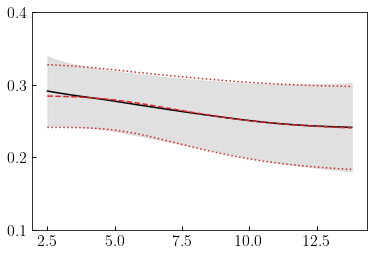

In [32]:
e_history_best = mc_generate_e_history(tarr_fit, p_best)
e_h_med_best = np.mean(e_history_best, axis=0)
e_h_std_best = np.std(e_history_best, axis=0)

fig, ax = plt.subplots(1, 1)
ylim = ax.set_ylim(0.1, 0.4)
__=ax.fill_between(tarr_fit, e_mean_target-e_std_target, e_mean_target+e_std_target, alpha=0.7, color='lightgray')
__=ax.plot(tarr_fit, e_mean_target, color='k')

__=ax.plot(tarr_fit, e_h_med_best, '--', color=mred)
__=ax.plot(tarr_fit, e_h_med_best-e_h_std_best, ':', color=mred)
__=ax.plot(tarr_fit, e_h_med_best+e_h_std_best, ':', color=mred)

## $\log_{10}M_{\rm peak}=14.25$

In [33]:
logmp_sample = 14.25

if logmp_sample >= 13.5:
    halos = mdpl_fits
else:
    halos = bpl_fits

mmsk = np.abs(halos['logmp'] - logmp_sample) < 0.1
sample = halos[mmsk]

e_history_target = e_vs_t_vmap(tarr_fit, 10**sample['e_lgtc'], sample['e_k'], sample['e_early'], sample['e_late'])
e_mean_target = np.mean(e_history_target, axis=0)
e_std_target = np.std(e_history_target, axis=0)

loss_data = tarr_fit, e_mean_target, e_std_target

In [34]:
res = minimize(loss, p_best_last, args=(loss_data, ), method='Nelder-Mead')
res = minimize(loss, res.x, args=(loss_data, ), method='Nelder-Mead')
p_best = res.x
print(res.message)
np.save(outpat.format(logmp_sample), p_best)
p_best_last = np.copy(p_best)

Optimization terminated successfully.


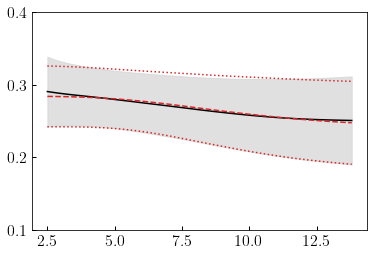

In [35]:
e_history_best = mc_generate_e_history(tarr_fit, p_best)
e_h_med_best = np.mean(e_history_best, axis=0)
e_h_std_best = np.std(e_history_best, axis=0)

fig, ax = plt.subplots(1, 1)
ylim = ax.set_ylim(0.1, 0.4)
__=ax.fill_between(tarr_fit, e_mean_target-e_std_target, e_mean_target+e_std_target, alpha=0.7, color='lightgray')
__=ax.plot(tarr_fit, e_mean_target, color='k')

__=ax.plot(tarr_fit, e_h_med_best, '--', color=mred)
__=ax.plot(tarr_fit, e_h_med_best-e_h_std_best, ':', color=mred)
__=ax.plot(tarr_fit, e_h_med_best+e_h_std_best, ':', color=mred)

## $\log_{10}M_{\rm peak}=14.5$

In [36]:
logmp_sample = 14.5

if logmp_sample >= 13.5:
    halos = mdpl_fits
else:
    halos = bpl_fits

mmsk = np.abs(halos['logmp'] - logmp_sample) < 0.1
sample = halos[mmsk]

e_history_target = e_vs_t_vmap(tarr_fit, 10**sample['e_lgtc'], sample['e_k'], sample['e_early'], sample['e_late'])
e_mean_target = np.mean(e_history_target, axis=0)
e_std_target = np.std(e_history_target, axis=0)

loss_data = tarr_fit, e_mean_target, e_std_target

In [37]:
res = minimize(loss, p_best_last, args=(loss_data, ), method='Nelder-Mead')
res = minimize(loss, res.x, args=(loss_data, ), method='Nelder-Mead')
p_best = res.x
print(res.message)
np.save(outpat.format(logmp_sample), p_best)
p_best_last = np.copy(p_best)

Optimization terminated successfully.


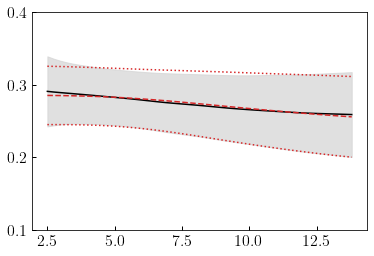

In [38]:
e_history_best = mc_generate_e_history(tarr_fit, p_best)
e_h_med_best = np.mean(e_history_best, axis=0)
e_h_std_best = np.std(e_history_best, axis=0)

fig, ax = plt.subplots(1, 1)
ylim = ax.set_ylim(0.1, 0.4)
__=ax.fill_between(tarr_fit, e_mean_target-e_std_target, e_mean_target+e_std_target, alpha=0.7, color='lightgray')
__=ax.plot(tarr_fit, e_mean_target, color='k')

__=ax.plot(tarr_fit, e_h_med_best, '--', color=mred)
__=ax.plot(tarr_fit, e_h_med_best-e_h_std_best, ':', color=mred)
__=ax.plot(tarr_fit, e_h_med_best+e_h_std_best, ':', color=mred)